In [7]:
from web_scraping import get_team_goals
from poisson import prob_dist, prob
from allocation import alloc
from cached_thread_function import open_web_scraper

# Marseille - PSG
## 1. Get the data

In [3]:
# Check "Flashscore.com" to get the exact names of the both teams, otherwise it won't work
name1='Marseille'   # Marseille
name2='PSG'         # PSG

team1, team2=open_web_scraper(2, get_team_goals, name1, name2, 2022)

## 2. Plot the Poisson distribution and add the results in a list

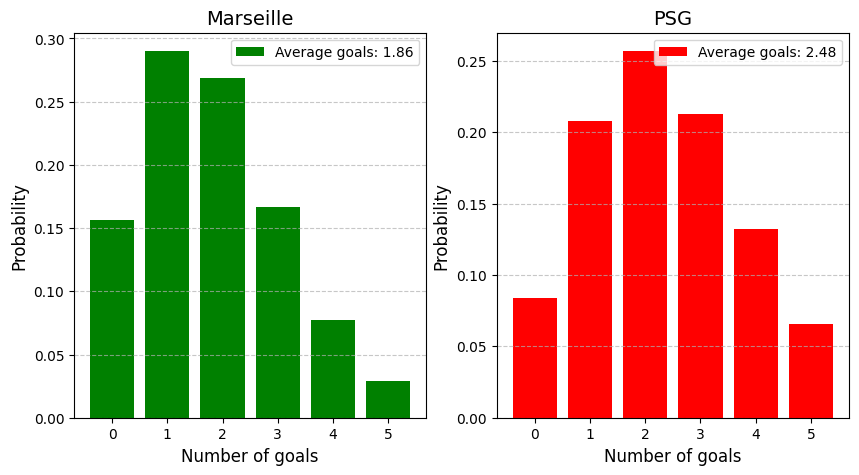

In [4]:
from statistics import mean
goals1=team1[0]['goals']
goals2=team2[0]['goals']
prob_dist(mean(goals1), mean(goals2), n=[name1, name2], goals=5)

In [5]:
# Append the results into a list
res=[prob(mean(goals1), mean(goals2), n=[name1, name2], goals=5)]

In [6]:
res

[{'Marseille': {'goals': [0, 1, 2, 3, 4, 5],
   'p': [0.156, 0.29, 0.269, 0.167, 0.077, 0.029]},
  'PSG': {'goals': [0, 1, 2, 3, 4, 5],
   'p': [0.084, 0.208, 0.257, 0.213, 0.132, 0.066]}}]

11.11.2025 - UPDATE: The game I am showing was played on 22nd of September 2025. Since then, I did not update the odds or the events of the game. But the idea is the same !

## From the plots above, we can pick 4 events:
### 1. Marseille > 0.5
### 2. Marseille < 2.5
### 3. PSG > 0.5
### 4. PSG < 3.5
## Now manually check with a sports betting platform to see the odds of these events.

In [41]:
# Calculate the probabilities for each event
marseille_over_0_5=1-res[0][name1]['p'][0]
marseille_under_2_5=sum(res[0][name1]['p'][:3])
psg_over_0_5=1-res[0][name2]['p'][0]
psg_under_3_5=sum(res[0][name2]['p'][:4])

In [42]:
probabilities=[marseille_over_0_5, marseille_under_2_5, psg_over_0_5, psg_under_3_5]
probabilities

[0.904, 0.585, 0.889, 0.8200000000000001]

In [43]:
# For me, these are the odds offered by the sports betting platform I chose to get the odds from
# 11.11.2025 - UPDATE: once again, for the game played on 22nd of September 2025
odds=[1.35, 1.08, 1.10, 1.06]
odds

[1.35, 1.08, 1.1, 1.06]

## 3. Allocate money amongst the bets

In [44]:
bets=alloc(odds, probabilities, 1000) # Suppose we have $1000 available balance
bets

[1000.0, 0, 0, 0]

In [45]:
# Check the potential winnings
potential_wins=[bets[i]*odds[i] for i in range(len(bets))]

potential_wins, sum(potential_wins)

([1350.0, 0.0, 0.0, 0.0], 1350.0)

In [46]:
first_event=bets[0]
second_event=bets[1]
third_event=bets[2]
fourth_event=bets[3]

In [47]:
# The model indicates the following allocation of the $1000:
print(f'\t1. {first_event} \n',
      f'\t2. {second_event} \n',
      f'\t3. {third_event} \n',
      f'\t4. {fourth_event} \n')

	1. 1000.0 
 	2. 0 
 	3. 0 
 	4. 0 

